In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import * 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_test)

10000

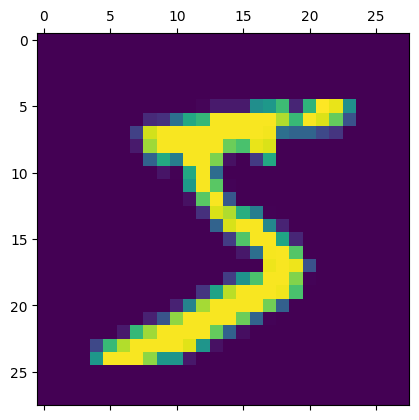

In [6]:
plt.matshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
# single layer neural network

## First way to do it
# model = keras.Sequential([
#     keras.Input(shape=(784,)),
#     keras.layers.Dense(10, activation='sigmoid')
# ])
# model.add(Dense(units=4,input_shape=(3,))) #hidden layer 1 with input
# #further layers:    
# model.add(Dense(units=4)) #hidden layer 2
# model.add(Dense(units=1)) #output layer   


## Second way to do it

#Start defining the input tensor:
inpTensor = keras.Input((784,))   

#create the layers and pass them the input tensor to get the output tensor:    
# hidden1Out = keras.layers.Dense(units=100, activation='relu')(inpTensor)    
# hidden2Out = Dense(units=4)(hidden1Out)    
finalOut = keras.layers.Dense(units=10, activation='sigmoid')(inpTensor)   

#define the model's start and end points    
model = keras.Model(inpTensor,finalOut)

# Optimizers allow you to train eff
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.8112 - loss: 0.7279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.9139 - loss: 0.3069
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9213 - loss: 0.2815
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.9234 - loss: 0.2715
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.9268 - loss: 0.2653


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.9160 - loss: 0.3034


[0.26821520924568176, 0.9258000254631042]

In [11]:
y_predictions = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


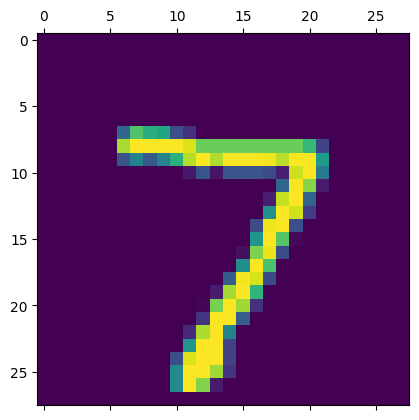

In [12]:
plt.matshow(X_test[0])

In [13]:
y_predicted_labels = [np.argmax(x) for x in y_predictions]

In [14]:
print(f"predicted is {y_predicted_labels[:10]}")
print(f"truth is     {y_test[:10].tolist()}")

predicted is [7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
truth is     [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    8,  915,   20,    6,    3,   13,   10,   43,    5],
       [   4,    0,   15,  926,    0,   18,    2,   10,   23,   12],
       [   1,    1,    3,    1,  899,    0,   13,    4,   10,   50],
       [  11,    2,    2,   35,    8,  772,   19,    7,   29,    7],
       [  14,    3,    6,    1,    7,   10,  913,    2,    2,    0],
       [   2,    5,   20,    7,    3,    0,    0,  952,    3,   36],
       [   8,    6,    7,   17,    9,   24,   10,   11,  874,    8],
       [  11,    5,    1,    9,   13,    6,    0,   21,    8,  935]])>

Text(95.72222222222221, 0.5, 'Truth')

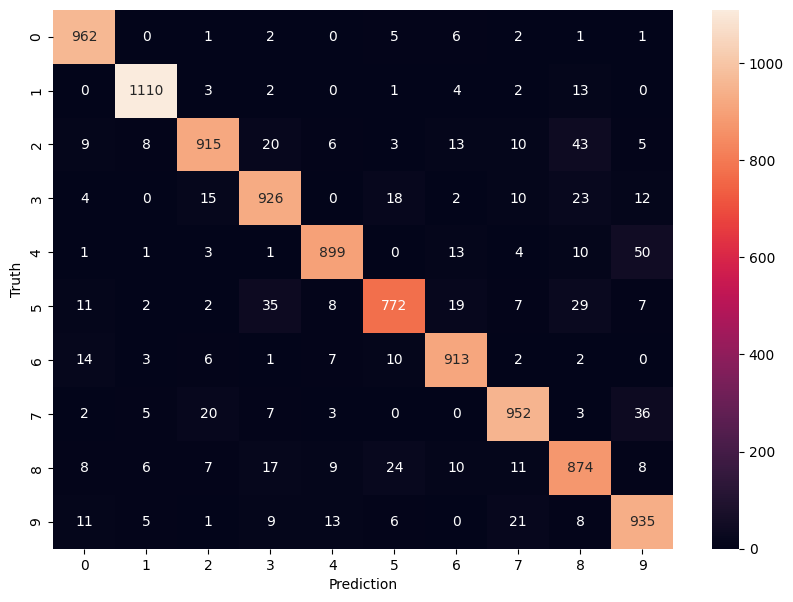

In [18]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [31]:
inpTensor2 = keras.Input((784,))   

#create the layers and pass them the input tensor to get the output tensor:    
hidden1Out2 = keras.layers.Dense(units=128, activation='relu')(inpTensor2) 
hidden2Out2 = keras.layers.Dense(units=64, activation='relu')(hidden1Out2)           
finalOut2 = keras.layers.Dense(units=10, activation='softmax')(hidden2Out2)   

#define the model's start and end points    
model2 = keras.Model(inpTensor2,finalOut2)

# Optimizers allow you to train eff
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.8772 - loss: 0.4267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.9672 - loss: 0.1092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.9782 - loss: 0.0704
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9835 - loss: 0.0539
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9874 - loss: 0.0389


In [32]:
model2.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9720 - loss: 0.0925


[0.0789944976568222, 0.9764000177383423]

In [33]:
model3 = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model3.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5


d:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9120 - loss: 0.2906
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0428
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9911 - loss: 0.0276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0191
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0131


In [37]:
model3.evaluate(X_test_flattened, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.0436


[0.03601565584540367, 0.9886999726295471]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

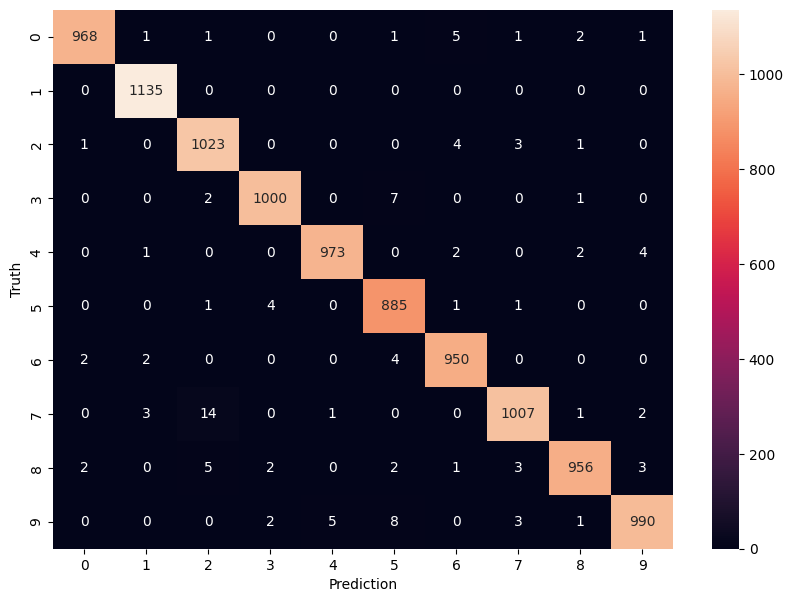

In [42]:
y_predictions3 = model3.predict(X_test_flattened)
y_predicted_labels3 = [np.argmax(x) for x in y_predictions3]


cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)

plt.figure(figsize=(10, 7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')